# 1. Setup

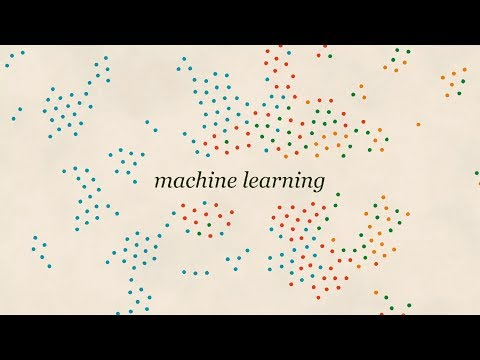

In [1]:
# Run the next code block for a short video from Google that explores how and why it's important to consider bias when thinking about machine learning:
import IPython
IPython.display.YouTubeVideo('59bMh59JQDo')

#### Import the relevant Packages

In [2]:
import tensorflow as tf
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import mitdeeplearning as mdl

# 2. Datasets
We'll be using three datasets in this lab. In order to train our facial detection models, we'll need a `dataset of positive examples (i.e., of faces)` and a `dataset of negative examples (i.e., of things that are not faces)`. We'll use these data to train our models to classify images as either faces or not faces. Finally, we'll need a `test dataset` of face images. Since we're concerned about the potential bias of our learned models against certain demographics, it's important that the test dataset we use has equal representation across the demographics or features of interest. In this lab, we'll consider **skin tone and gender.**

- `Positive training data`: **CelebA Dataset**. A large-scale (over 200K images) of celebrity faces.
- `Negative training data`: **ImageNet**. Many images across many different categories. We'll take negative examples from a variety of non-human categories. Fitzpatrick Scale skin type classification system, with each image labeled as "Lighter'' or "Darker''.

Let's begin by importing these datasets. We've written a class that does a bit of data pre-processing to import the training data in a usable format.

In [3]:
# Get the training data: both images from CelebA and ImageNet
path_to_training_data = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
# Instantiate a TrainingDatasetLoader using the downloaded dataset
loader = mdl.lab2.TrainingDatasetLoader(path_to_training_data)

1263902720/1263889489 [==============================] - 105s 0us/step
Opening C:\Users\User\.keras\datasets\train_face.h5
Loading data into memory...


We can look at the size of the training dataset and grab a batch of size 100:

In [4]:
number_of_training_examples = loader.get_train_size()
(images, labels) = loader.get_batch(100)